In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
df = pd.read_csv("data/diabetes.csv")

# Display basic information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neurological Assessments      9893 non-null   int64 
 1   Physical Activity             9893 non-null   int64 
 2   Socioeconomic Factors         9893 non-null   int64 
 3   Alcohol Consumption           9893 non-null   int64 
 4   Urine Test                    9893 non-null   int64 
 5   BMI                           9893 non-null   int64 
 6   Waist Circumference           9893 non-null   int64 
 7   Weight Gain During Pregnancy  9893 non-null   int64 
 8   Insulin Levels                9893 non-null   int64 
 9   Age                           9893 non-null   int64 
 10  Pulmonary Function            9893 non-null   int64 
 11  Blood Pressure                9893 non-null   int64 
 12  Digestive Enzyme Levels       9893 non-null   int64 
 13  Panc

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Neurological Assessments        0
Physical Activity               0
Socioeconomic Factors           0
Alcohol Consumption             0
Urine Test                      0
BMI                             0
Waist Circumference             0
Weight Gain During Pregnancy    0
Insulin Levels                  0
Age                             0
Pulmonary Function              0
Blood Pressure                  0
Digestive Enzyme Levels         0
Pancreatic Health               0
Blood Glucose Levels            0
Cholesterol Levels              0
Birth Weight                    0
Target                          0
dtype: int64


In [5]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Neurological Assessments  Physical Activity  Socioeconomic Factors  \
count               9893.000000        9893.000000            9893.000000   
mean                   0.791267           0.994845               1.000404   
std                    0.676117           0.814393               0.811861   
min                    0.000000           0.000000               0.000000   
25%                    0.000000           0.000000               0.000000   
50%                    1.000000           1.000000               1.000000   
75%                    1.000000           2.000000               2.000000   
max                    2.000000           2.000000               2.000000   

       Alcohol Consumption   Urine Test          BMI  Waist Circumference  \
count          9893.000000  9893.000000  9893.000000          9893.000000   
mean              1.011827     1.501264    24.795714            34.978470   
std               0.816060     1.114150     5.948748  

In [7]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

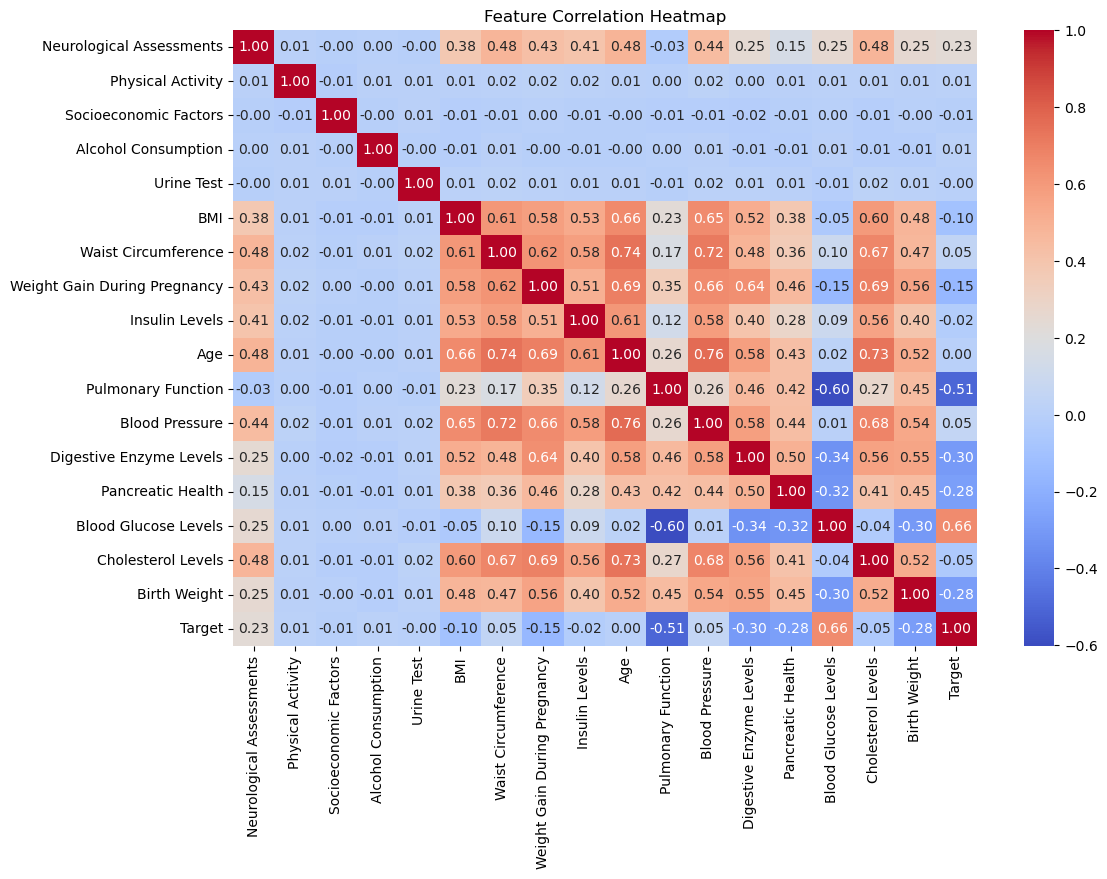

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

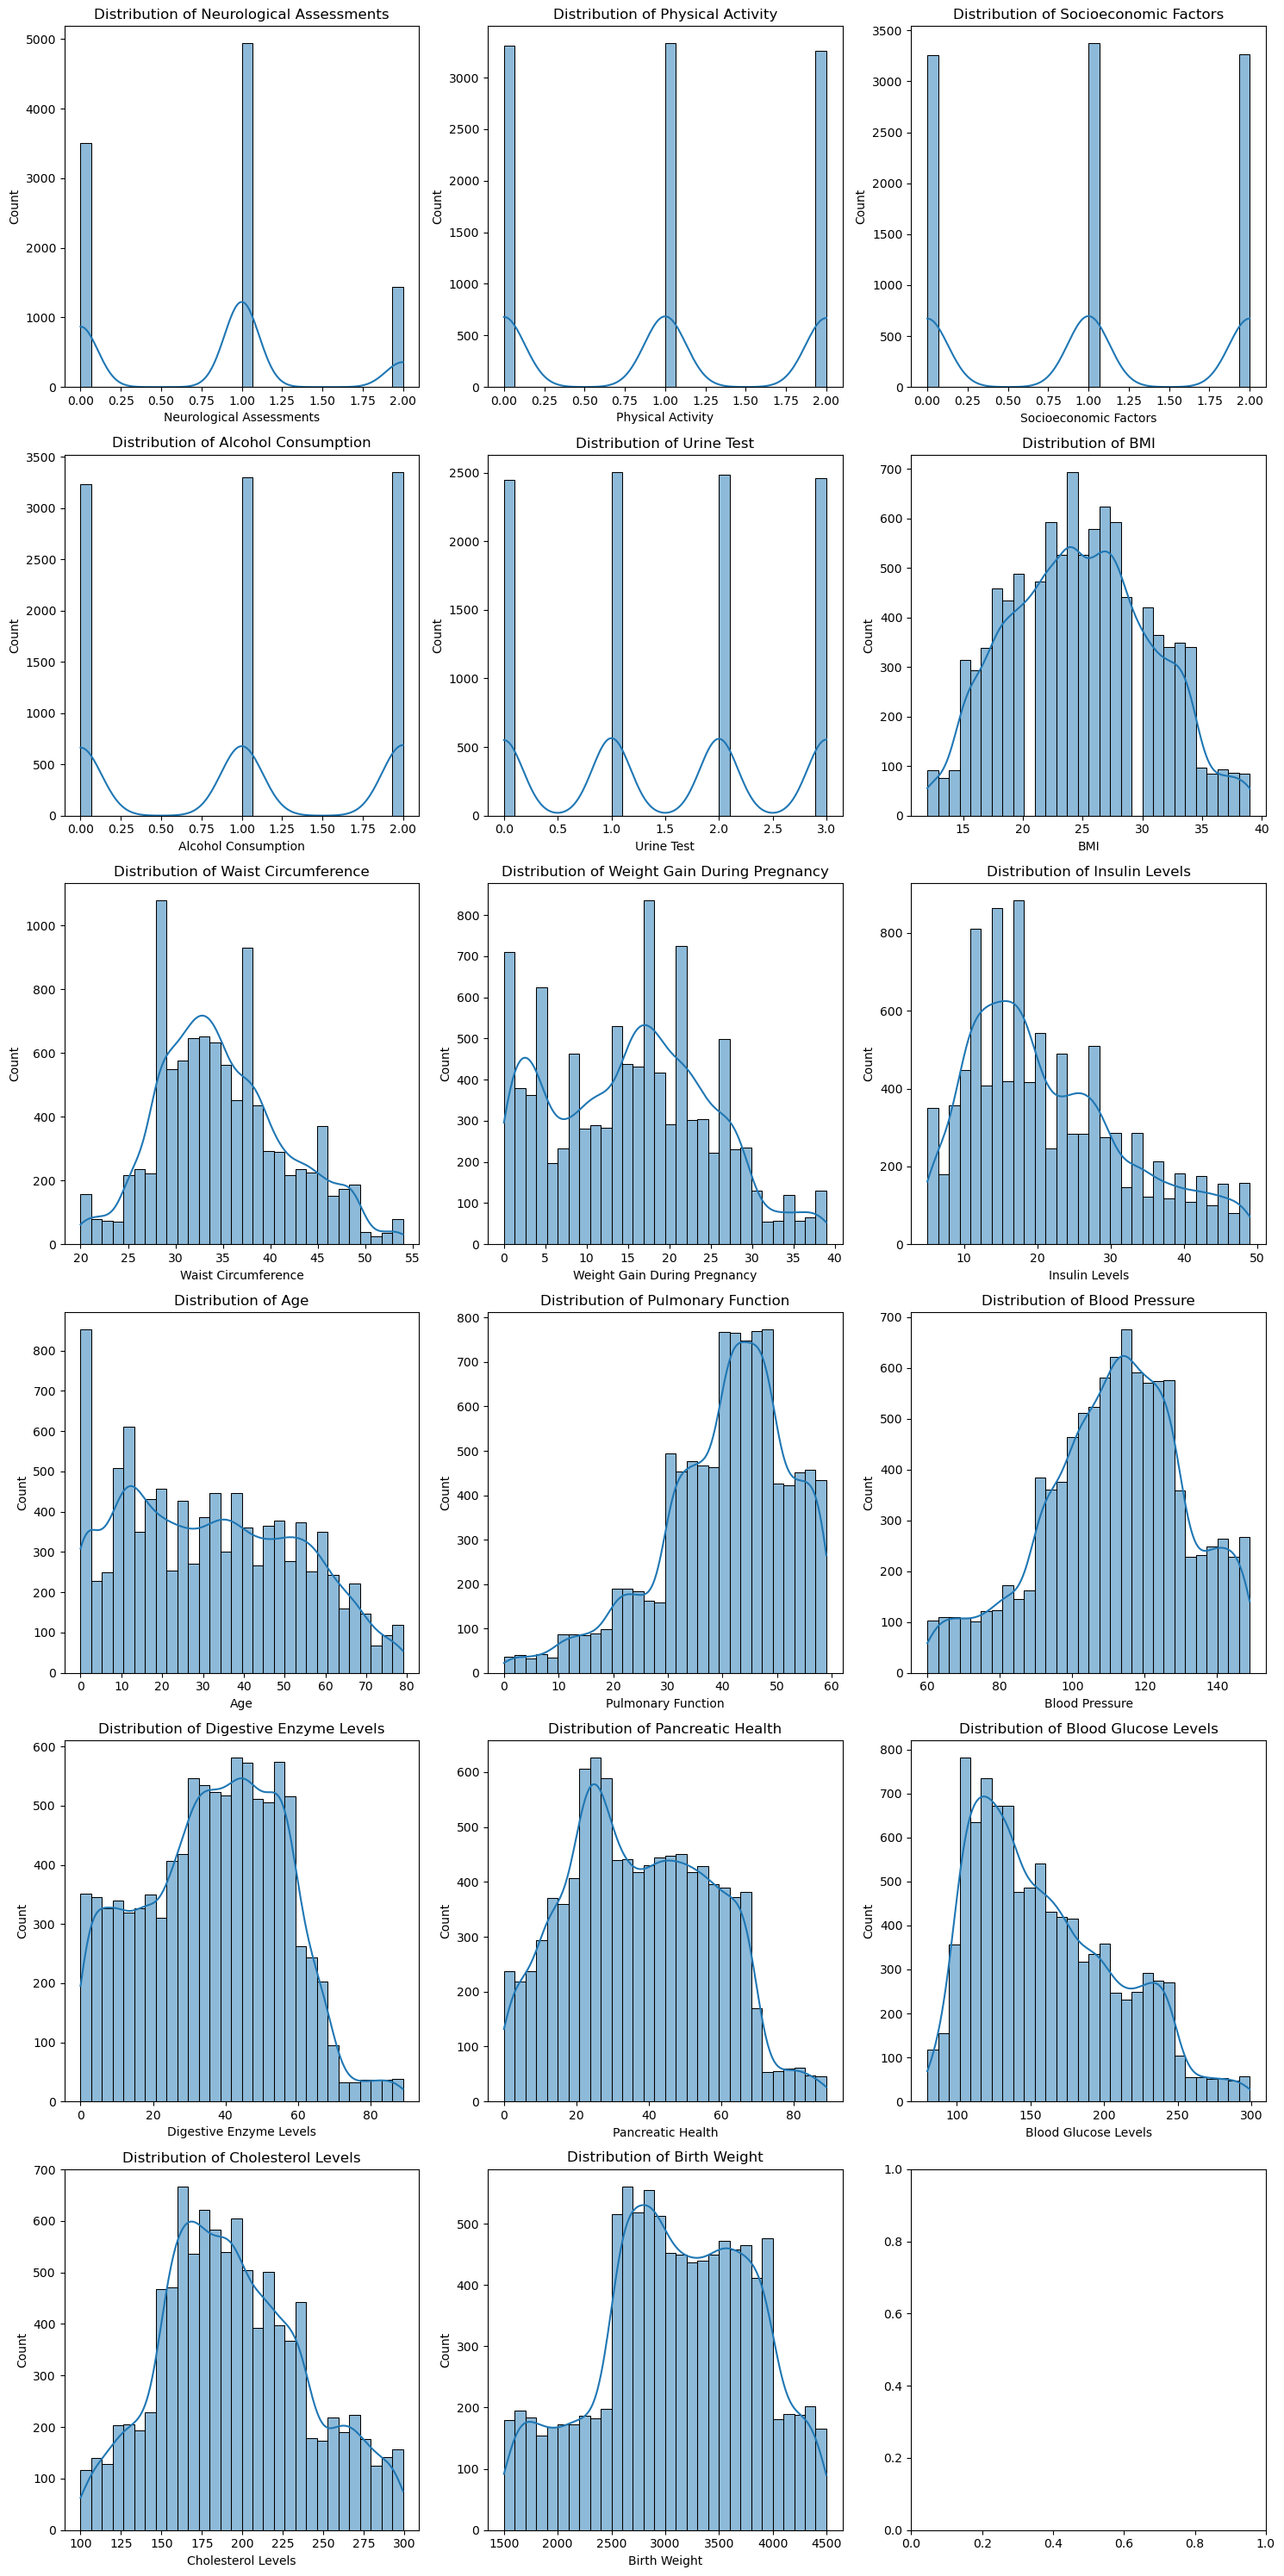

In [9]:
# Distribution plots for numerical features (in a grid layout)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

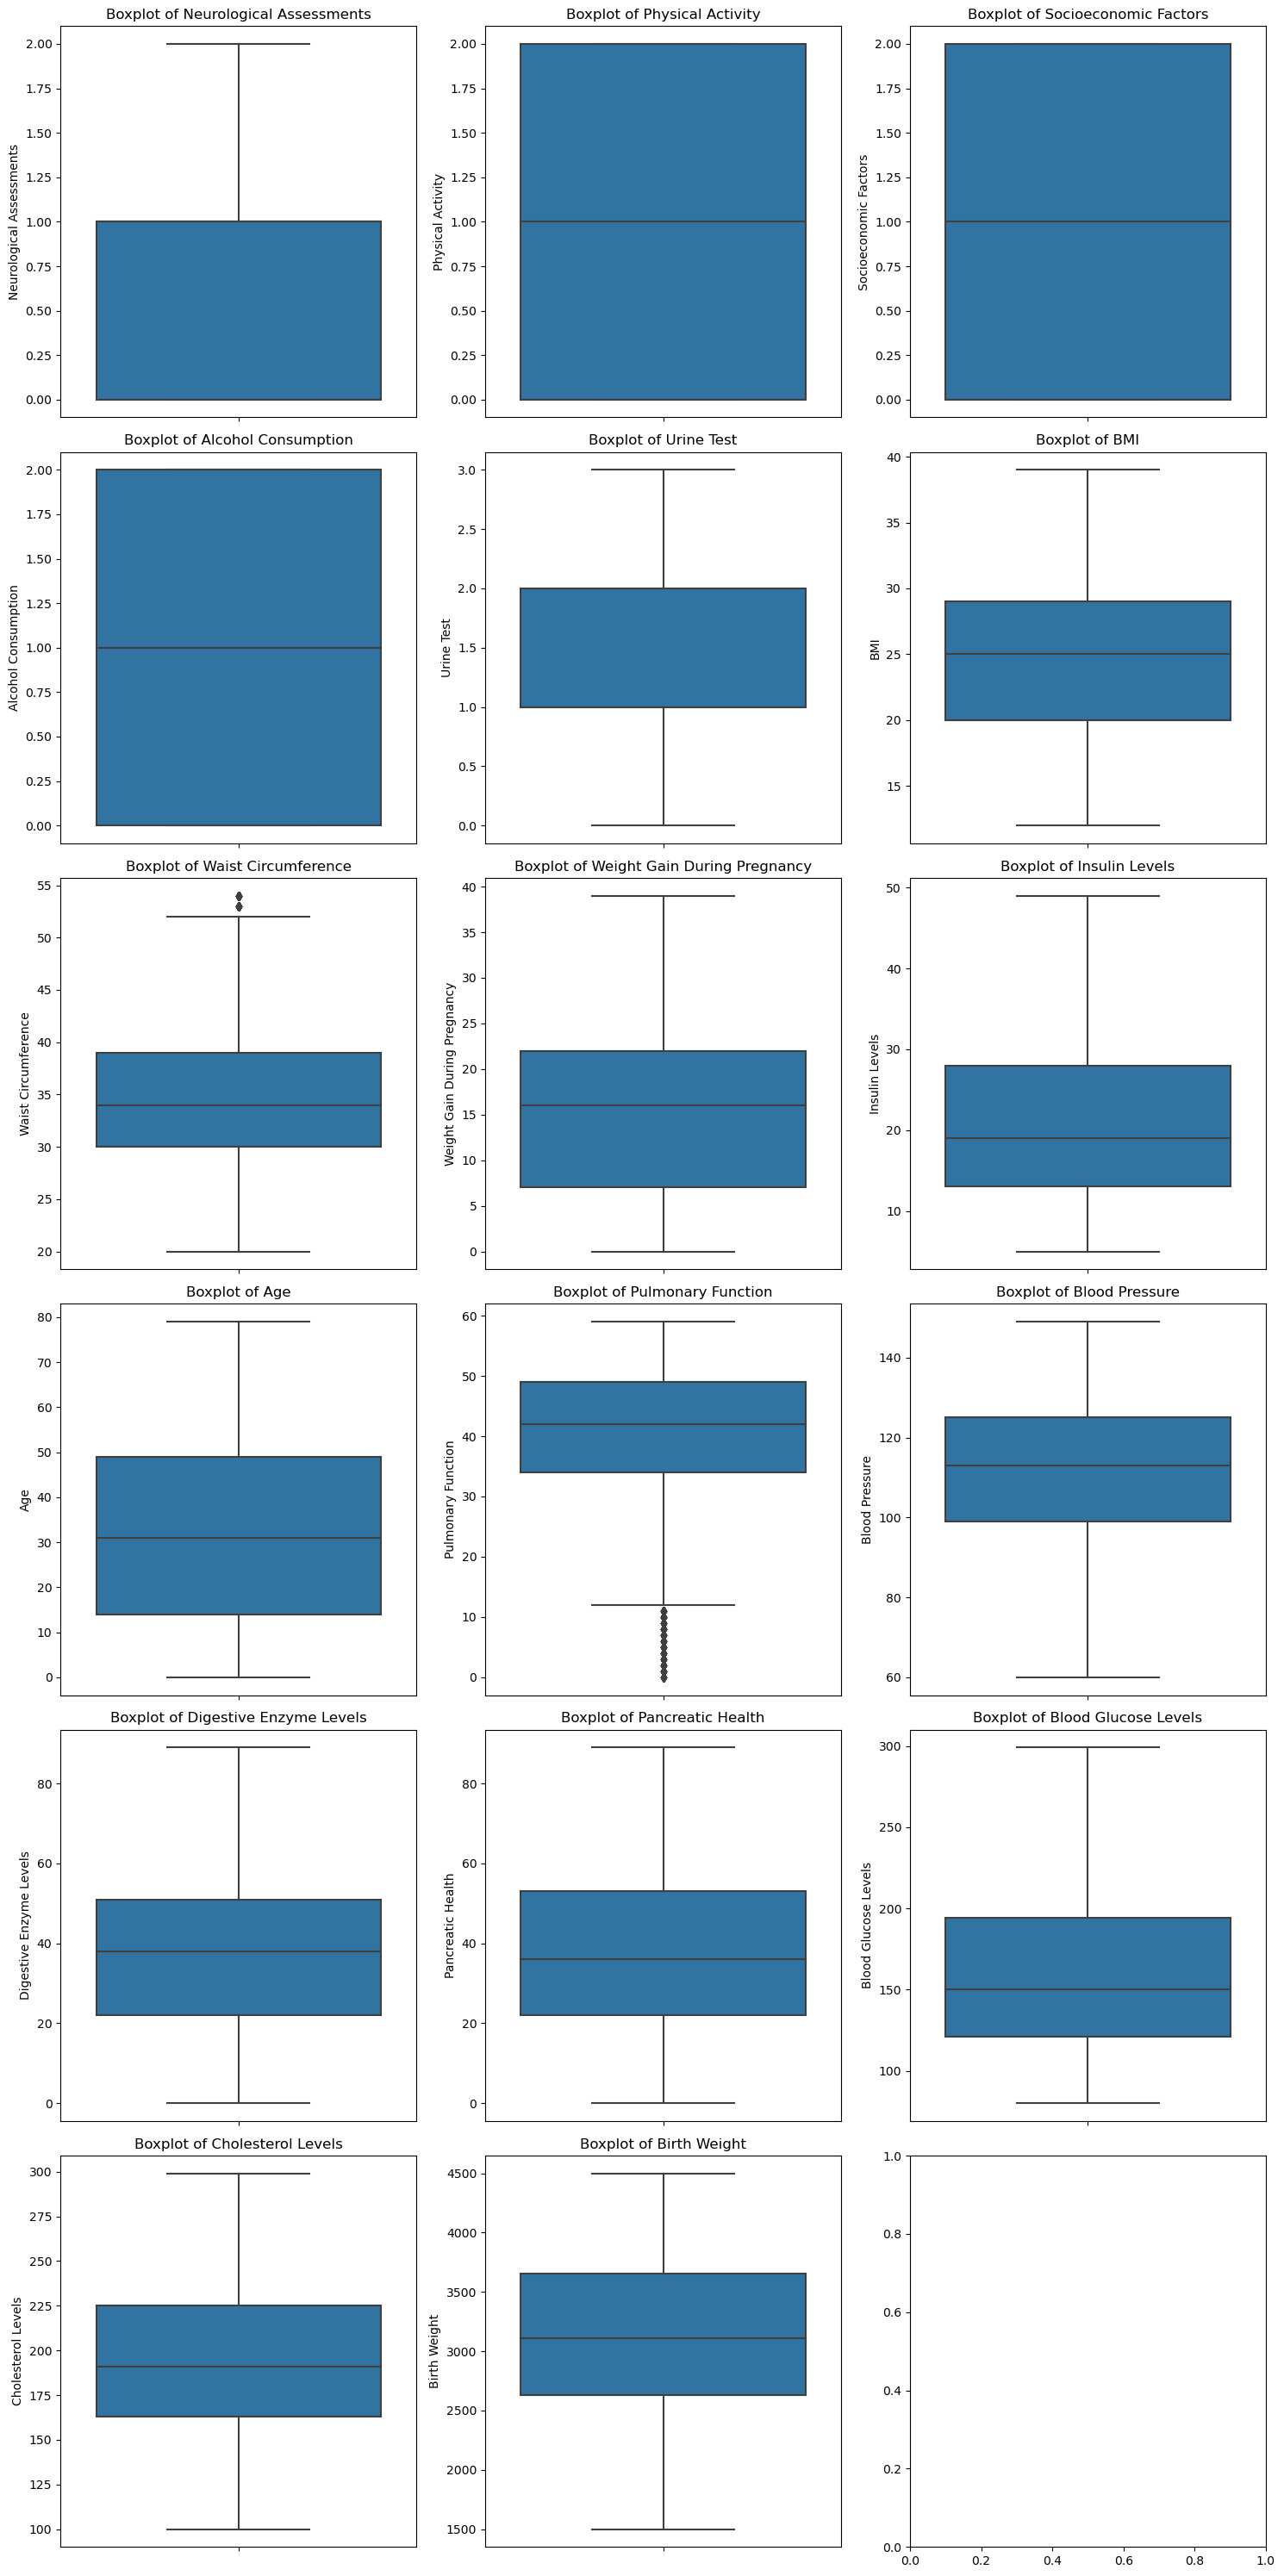

In [10]:
# Boxplots for numerical features to check for outliers
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [14]:
# Define features and target
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8873168266801414

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       145
           1       0.87      0.95      0.91       149
           2       0.96      0.91      0.94       151
           3       0.92      0.86      0.89       176
           4       1.00      1.00      1.00       156
           5       0.99      1.00      0.99       159
           6       0.76      0.63      0.69       139
           7       0.77      0.73      0.75       142
           8       0.86      0.96      0.91       160
           9       0.77      0.78      0.78       155
          10       0.84      1.00      0.91       172
          11       0.94      0.86      0.90       133
          12       0.88      0.95      0.92       142

    accuracy                           0.89      1979
   macro avg       0.89      0.88      0.88      1979
weighted avg       0.89      0.89      0.89      1979



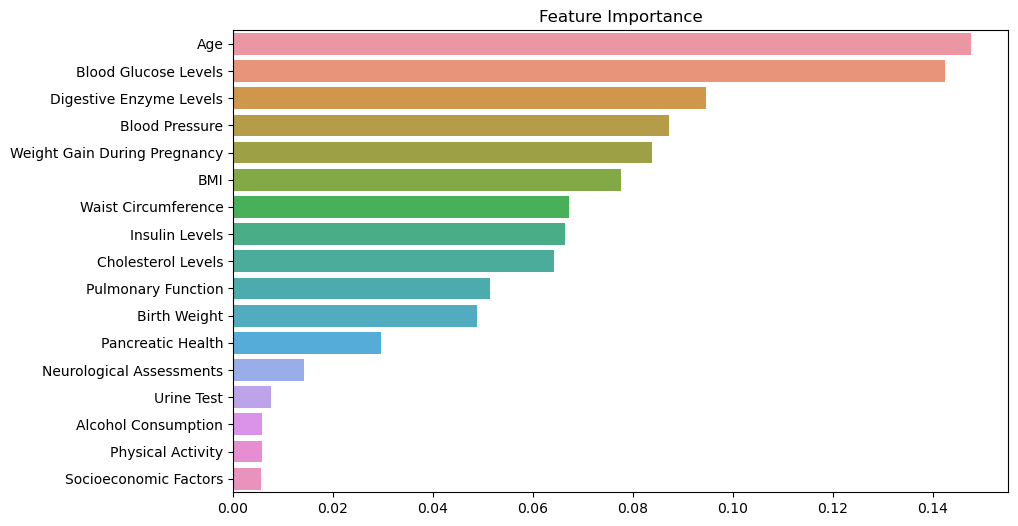

In [18]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()

In [19]:
def get_recommendations(input_data):
    prediction = model.predict([input_data])[0]  # Get predicted label

    # Reverse mapping from encoded label to original class
    target_classes = list(label_encoders['Target'].classes_)  # Get original labels
    predicted_class = target_classes[prediction]  # Convert encoded value to label

    # Define recommendations based on predicted class
    recommendations = {
        "Low Risk": "Maintain a balanced diet and regular exercise to stay healthy!",
        "Medium Risk": "Consider reducing sugar intake, exercising more, and monitoring your glucose levels.",
        "High Risk": "Consult a doctor immediately and follow a strict diet and exercise plan!",
        "Prediabetes": "Monitor blood sugar levels regularly, exercise daily, and reduce carbohydrate intake.",
        "Insulin Resistance": "Increase physical activity, focus on fiber-rich foods, and avoid processed sugars.",
        "Steroid-Induced Diabetes": "Consult your doctor about adjusting steroid doses. Follow a low-carb diet and exercise regularly.",
        "Type 1 Diabetes": "Monitor blood glucose levels frequently and take insulin as prescribed.",
        "Type 2 Diabetes": "Follow a low-sugar diet, exercise regularly, and maintain a healthy weight.",
        "Gestational Diabetes": "Monitor blood sugar levels during pregnancy and consult your doctor for dietary changes.",
        "Secondary Diabetes": "Manage your condition with proper medication and regular doctor checkups.",
        "Other": "Consult a specialist for further diagnosis and personalized advice."
    }

    # Return risk level and recommendation
    return predicted_class, recommendations.get(predicted_class, "Consult a healthcare professional for guidance.")



In [20]:
# Example Usage
sample_data = X_test.sample(1).values.flatten().tolist()
risk_level, advice = get_recommendations(sample_data)
print(f"\nPredicted Risk Level: {risk_level}\nRecommendation: {advice}")



Predicted Risk Level: Secondary Diabetes
Recommendation: Manage your condition with proper medication and regular doctor checkups.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
